In [56]:
import pandas as pd
import numpy as np
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()

## 행정동 코드 전처리

In [91]:
loc_code = pd.read_csv('dataset/LOCAL_PEOPLE_DONG_201904/code.csv', encoding='euc-kr')
loc_code['시군구코드'] = loc_code['시군구코드'].astype(str)
loc_code['행정동코드'] = loc_code['행정동코드'].astype(str)
loc_code['행정동코드_'] = loc_code['시군구코드'] + loc_code['행정동코드']
loc_code = loc_code[loc_code['시도명'] == '서울특별시']
loc_code = loc_code[loc_code['행정동명'].isna() == False]
loc_code = loc_code[['행정동코드_', '시도명', '시군구명', '행정동명']]
loc_code['행정동명_'] = loc_code['시도명'] + ' ' + loc_code['시군구명'] + ' ' + loc_code['행정동명']
loc_code = loc_code[['시군구명', '행정동코드_', '행정동명_']]
loc_code = loc_code.drop_duplicates()
loc_code.isna().sum()

시군구명      0
행정동코드_    0
행정동명_     0
dtype: int64

In [106]:
loc_code['행정동코드_'] = loc_code['행정동코드_'].astype('int64')

## Geojson 불러오기

In [2]:
df = gpd.read_file('dataset/map/seoul-dong.geojson')
df.head()

,시,구,동,행정동코드,geometry
0,서울특별시,종로구,사직동,11110530,"MULTIPOLYGON (((126.97689 37.57565, 126.97703 ..."
1,서울특별시,종로구,삼청동,11110540,"MULTIPOLYGON (((126.98269 37.59507, 126.98337 ..."
2,서울특별시,종로구,부암동,11110550,"MULTIPOLYGON (((126.97585 37.59656, 126.97359 ..."
3,서울특별시,종로구,평창동,11110560,"MULTIPOLYGON (((126.97507 37.63139, 126.97649 ..."
4,서울특별시,종로구,무악동,11110570,"MULTIPOLYGON (((126.96067 37.58080, 126.96281 ..."


## 2003 / 2004 생활인구 데이터 불러오기

#### 20년 3월 데이터

In [9]:
ppl_2003 = pd.read_csv('dataset/LOCAL_PEOPLE_DONG_202003.csv')

# Fixing the index

col_names = ppl_2003.columns
ppl_2003 = ppl_2003.reset_index()
ppl_2003 = ppl_2003.iloc[:,:len(col_names)]
ppl_2003.columns = col_names
ppl_2003_ = ppl_2003.copy().round().astype('int64')

ppl_2003_.head()

,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,20200301,0,11110515,14314,522,333,441,688,508,419,...,464,468,612,679,730,644,536,429,375,1108
1,20200301,0,11140520,5366,153,22,50,192,294,388,...,262,289,277,213,193,152,122,118,74,107
2,20200301,0,11140540,6986,98,41,85,228,266,395,...,261,256,321,256,264,217,232,238,199,374
3,20200301,0,11140550,6926,125,38,80,227,368,412,...,307,274,317,177,278,194,174,157,131,351
4,20200301,0,11140570,5446,95,32,136,342,306,246,...,309,212,175,113,176,172,196,200,96,375


In [11]:
# 결측치 확인

ppl_2003_.isna().sum()

기준일ID              0
시간대구분              0
행정동코드              0
총생활인구수             0
남자0세부터9세생활인구수      0
남자10세부터14세생활인구수    0
남자15세부터19세생활인구수    0
남자20세부터24세생활인구수    0
남자25세부터29세생활인구수    0
남자30세부터34세생활인구수    0
남자35세부터39세생활인구수    0
남자40세부터44세생활인구수    0
남자45세부터49세생활인구수    0
남자50세부터54세생활인구수    0
남자55세부터59세생활인구수    0
남자60세부터64세생활인구수    0
남자65세부터69세생활인구수    0
남자70세이상생활인구수       0
여자0세부터9세생활인구수      0
여자10세부터14세생활인구수    0
여자15세부터19세생활인구수    0
여자20세부터24세생활인구수    0
여자25세부터29세생활인구수    0
여자30세부터34세생활인구수    0
여자35세부터39세생활인구수    0
여자40세부터44세생활인구수    0
여자45세부터49세생활인구수    0
여자50세부터54세생활인구수    0
여자55세부터59세생활인구수    0
여자60세부터64세생활인구수    0
여자65세부터69세생활인구수    0
여자70세이상생활인구수       0
dtype: int64

#### 20년 4월 데이터

In [15]:
ppl_2004 = pd.read_csv('dataset/LOCAL_PEOPLE_DONG_202004.csv', encoding='euc-kr')
ppl_2004_ = ppl_2004.copy().round().astype('int64')

# 3월을 제외한 4월 데이터만 추출

ppl_2004_ = ppl_2004_[ppl_2004_['기준일ID']>20200331]
ppl_2004_ = ppl_2004_.sort_values(by=['기준일ID'], ascending=True)
ppl_2004_.head()

,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
91583,20200401,23,11740700,33865,1181,596,958,908,1074,1203,...,1194,1121,1282,1289,1347,1385,1568,1421,1176,2626
84802,20200401,8,11110540,6230,79,60,122,417,230,381,...,181,252,269,224,192,194,230,192,171,325
84801,20200401,8,11110530,30394,417,185,237,623,1224,1692,...,1749,1799,1666,1374,1333,976,927,841,533,1572
84800,20200401,8,11110515,16544,531,338,441,711,775,695,...,566,630,743,729,677,658,645,421,378,1075
84799,20200401,7,11740700,33672,1192,601,926,911,1101,1264,...,1233,1165,1250,1343,1420,1383,1584,1374,1153,2551


In [14]:
# 결측치 확인

ppl_2004_.isna().sum()

기준일ID              0
시간대구분              0
행정동코드              0
총생활인구수             0
남자0세부터9세생활인구수      0
남자10세부터14세생활인구수    0
남자15세부터19세생활인구수    0
남자20세부터24세생활인구수    0
남자25세부터29세생활인구수    0
남자30세부터34세생활인구수    0
남자35세부터39세생활인구수    0
남자40세부터44세생활인구수    0
남자45세부터49세생활인구수    0
남자50세부터54세생활인구수    0
남자55세부터59세생활인구수    0
남자60세부터64세생활인구수    0
남자65세부터69세생활인구수    0
남자70세이상생활인구수       0
여자0세부터9세생활인구수      0
여자10세부터14세생활인구수    0
여자15세부터19세생활인구수    0
여자20세부터24세생활인구수    0
여자25세부터29세생활인구수    0
여자30세부터34세생활인구수    0
여자35세부터39세생활인구수    0
여자40세부터44세생활인구수    0
여자45세부터49세생활인구수    0
여자50세부터54세생활인구수    0
여자55세부터59세생활인구수    0
여자60세부터64세생활인구수    0
여자65세부터69세생활인구수    0
여자70세이상생활인구수       0
dtype: int64

## 2003 과 2004 concat

In [16]:
ppl = pd.concat([ppl_2003_, ppl_2004_])

## 20년도 3월 대비 4월에 생활인구가 증가하는 행정동 시각화

#### 3월/4월 1주차 수요일 오후 6시 ~ 9시 비교

- 구별 생활인구 변화가 가장 큰 행정동 하나만 plot 해볼 것

In [23]:
ppl_0304 = ppl[ppl['기준일ID']==20200304]
ppl_0304 = ppl_0304[(ppl_0304['시간대구분']>=18) & (ppl_0304['시간대구분']<=21)]
ppl_0304 = ppl_0304.groupby('행정동코드')['총생활인구수'].agg(sum)

ppl_0401 = ppl[ppl['기준일ID']==20200401]
ppl_0401 = ppl_0401[(ppl_0401['시간대구분']>=18) & (ppl_0401['시간대구분']<=21)]
ppl_0401 = ppl_0401.groupby('행정동코드')['총생활인구수'].agg(sum)

In [38]:
ppl_diff = (ppl_0401 - ppl_0304).sort_values(ascending=False)

# ppl_diff 에서 상위 0.05% 안에 드는 행정동 추출
ppl_diff_fnl = ppl_diff[:21]

In [39]:
center = [37.541, 126.986] # 맵이 center 에 위치하고, zoom 레벨은 11로 시작하는 맵 m을 만듭니다. 
m = folium.Map(location=center, zoom_start=10) # Choropleth 레이어를 만들고, 맵 m에 추가합니다. 
folium.Choropleth( geo_data=df, data=ppl_diff_fnl, columns=('행정동코드', '총생활인구수'), key_on='feature.properties.행정동코드', fill_color='PuRd', legend_name='총생활인구수').add_to(m)
# 맵 m을 출력합니다.

m

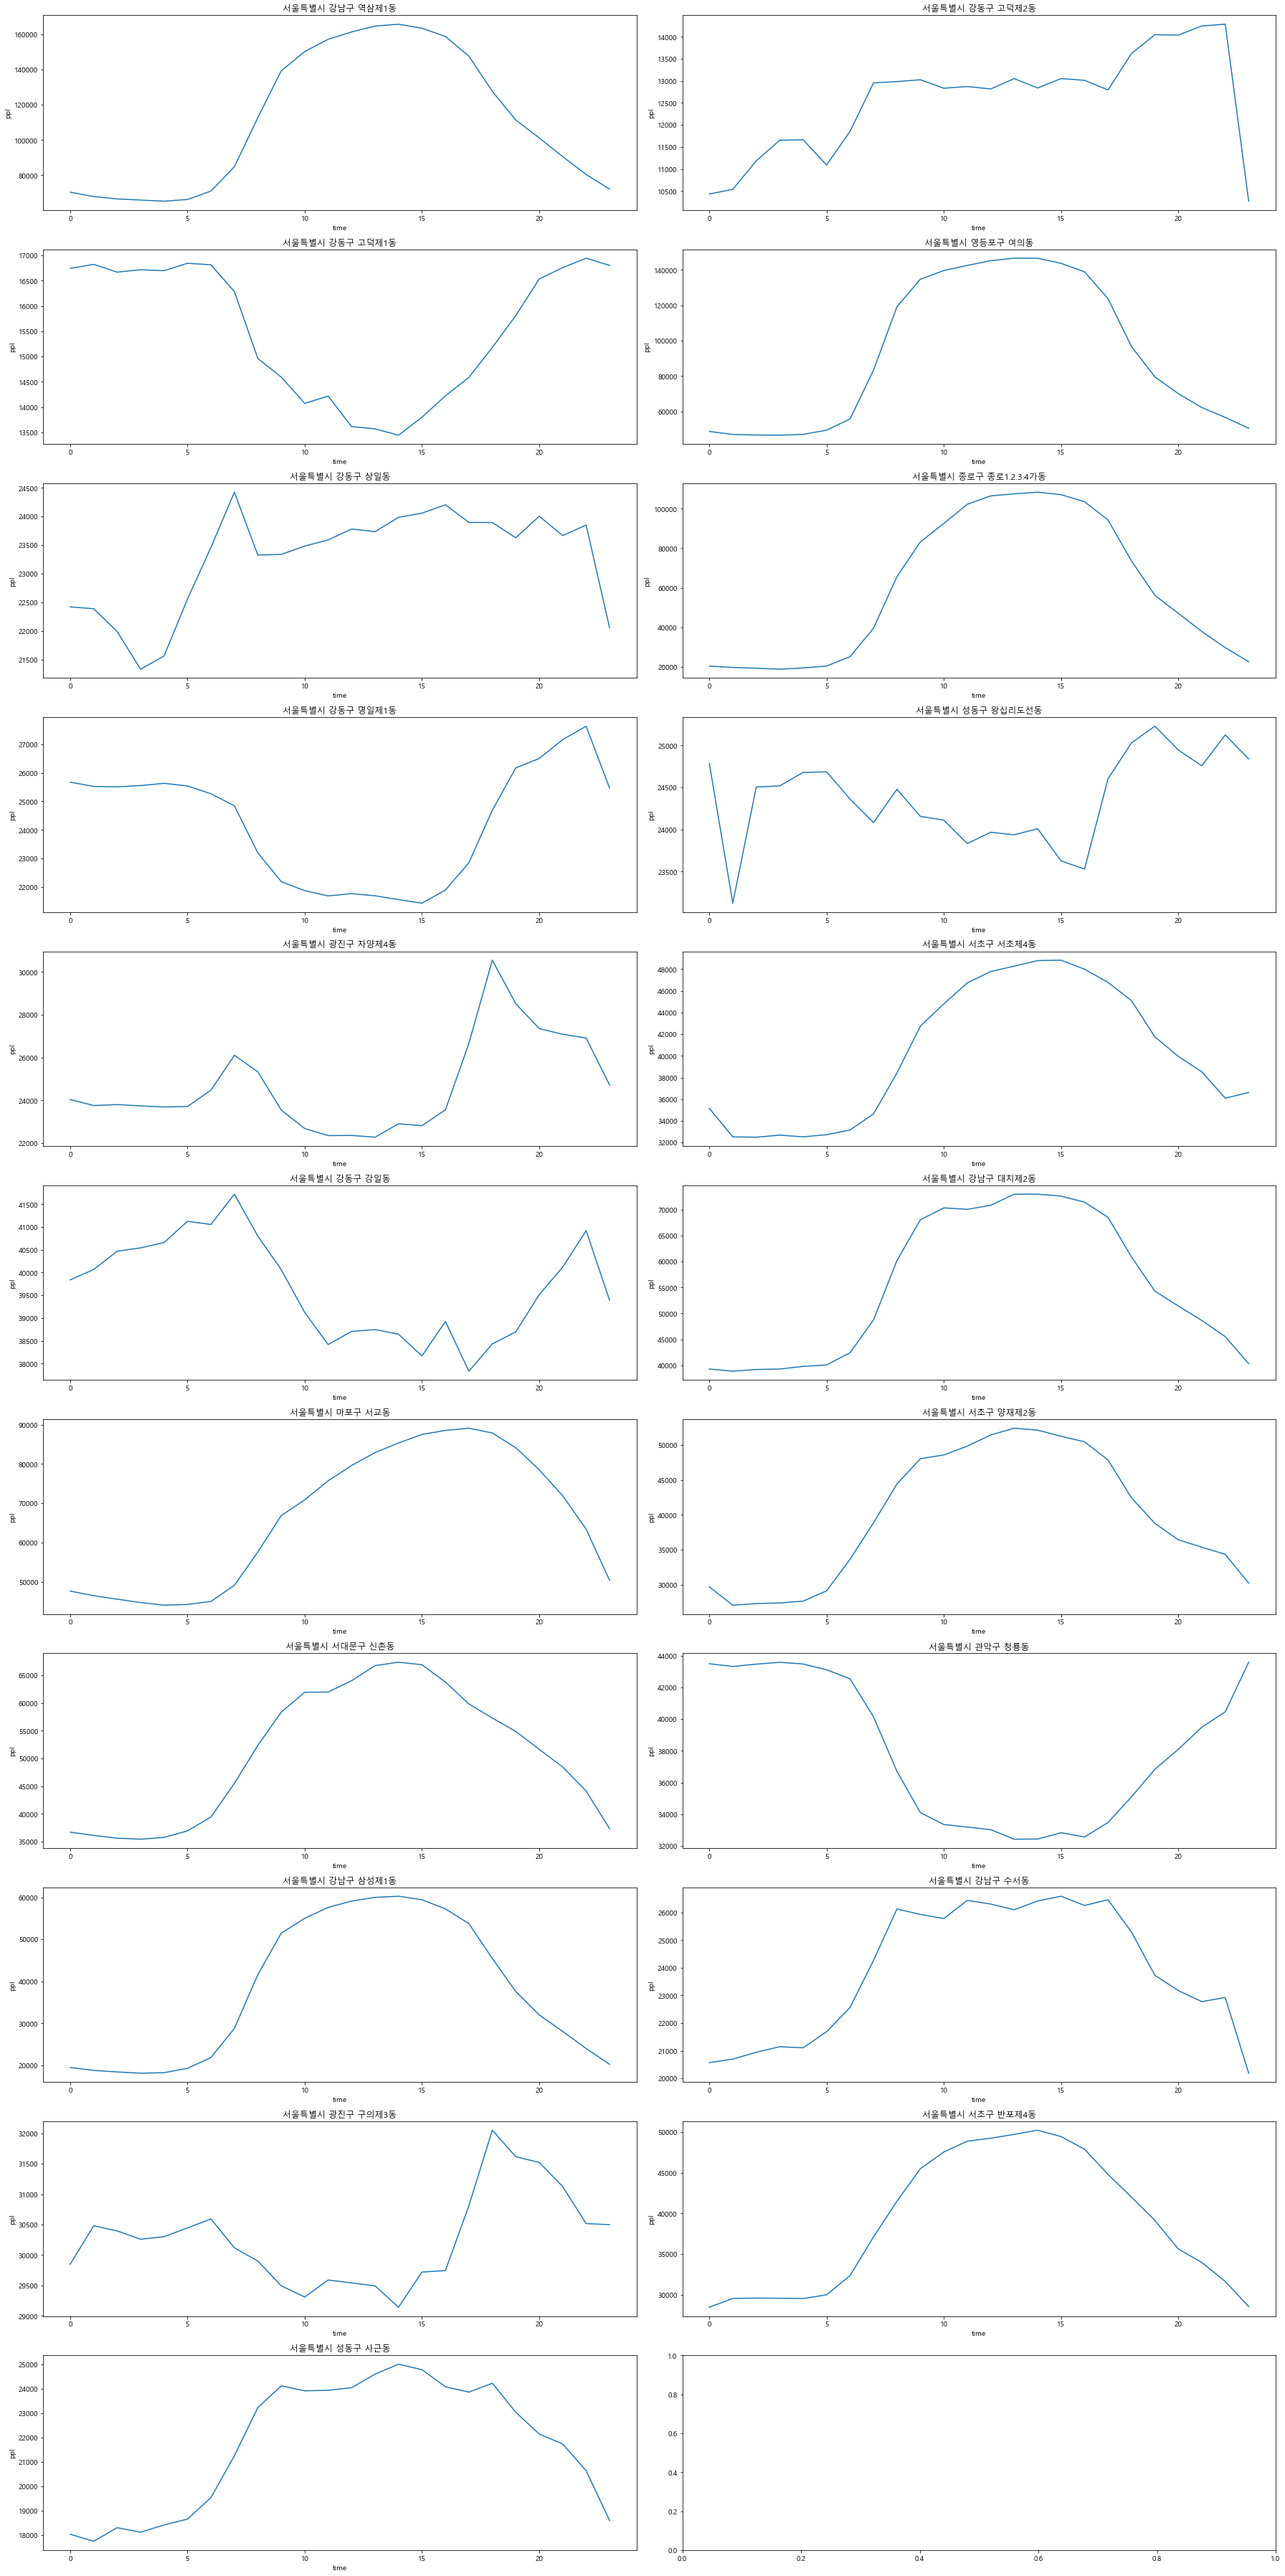

In [133]:
fig, axes = plt.subplots(11, 2, figsize=(25, 50))
axes = axes.ravel()
rc('font', family=font_name)
for i, dong in enumerate(ppl_diff_fnl.index):
    ppl_dong_tmp = ppl[(ppl['행정동코드'] == dong) & (ppl['기준일ID'] == 20200304)]
    ppl_dong = ppl_dong_tmp[['시간대구분', '총생활인구수']].set_index('시간대구분')
    axes[i].plot(ppl_dong)
    axes[i].title.set_text(loc_code[loc_code['행정동코드_'] == dong]['행정동명_'].values[0])
    axes[i].set_xlabel('time')
    axes[i].set_ylabel('ppl')
    plt.tight_layout()

## 각 동의 상권 위치 시각화

In [140]:
mkt = pd.read_csv('dataset/서울시 우리마을가게 상권분석서비스(상권영역).csv', encoding='euc-kr')

,기준_년월_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드,형태정보
0,201810,R,전통시장,1001453,낙성대시장,196121,442084,11620,11620585,NaN
1,201810,R,전통시장,1001454,봉천제일종합시장,195147,442413,11620,11620595,NaN
2,201810,R,전통시장,1001474,도곡시장,204551,444227,11680,11680650,NaN
3,201810,R,전통시장,1001475,강남개포시장,206065,443310,11680,11680670,NaN
4,201810,R,전통시장,1001412,화곡본동시장,186203,449328,11500,11500590,NaN


In [147]:
mkt = mkt[['상권_코드_명', '상권_구분_코드_명','행정동_코드', '엑스좌표_값', '와이좌표_값']]
mkt.columns = ['상권명', '상권구분','행정동코드','loc_x', 'loc_y']

In [200]:
for code in ppl_diff_fnl.index.values:
    mkt_tmp = mkt[mkt['행정동코드']==code]
    for i in mkt_tmp.index:
        folium.CircleMarker(
            location = mkt_tmp.loc[i, ['loc_x', 'loc_y']],
            tooltip = mkt_tmp.loc[i, '상권명'],
            radius = 100
        ).add_to(m)

In [201]:
m

# 연습

In [212]:
GRS80 = { 'proj':'tmerc', 'lat_0':'38', 'lon_0':'127', 'k':1, 'x_0':200000,
    'y_0':600000, 'ellps':'GRS80', 'units':'m' }
WGS84 = { 'proj':'latlong', 'datum':'WGS84', 'ellps':'WGS84', }


def grs80_to_wgs84(x, y):
   return transform( Proj(**GRS80), Proj(**WGS84), x, y )

In [210]:
mkt

,상권명,상권구분,행정동코드,loc_x,loc_y
0,낙성대시장,전통시장,11620585,196121,442084
1,봉천제일종합시장,전통시장,11620595,195147,442413
2,도곡시장,전통시장,11680650,204551,444227
3,강남개포시장,전통시장,11680670,206065,443310
4,화곡본동시장,전통시장,11500590,186203,449328
...,...,...,...,...,...
1491,양재역_3,발달상권,11650520,202755,443008
1492,양재역_2,발달상권,11650651,203216,442691
1493,서울 관악구 신림역_1,발달상권,11620645,193706,442615
1494,서울 관악구 신림역_2,발달상권,11620645,193880,442602


In [213]:
grs80_to_wgs84(196121, 442084)

(126.95666027855785, 36.57710848431788)

In [214]:
mkt_tt = mkt.copy()

In [215]:
mkt_tt.head()

,상권명,상권구분,행정동코드,loc_x,loc_y
0,낙성대시장,전통시장,11620585,196121,442084
1,봉천제일종합시장,전통시장,11620595,195147,442413
2,도곡시장,전통시장,11680650,204551,444227
3,강남개포시장,전통시장,11680670,206065,443310
4,화곡본동시장,전통시장,11500590,186203,449328


In [238]:
x,y = grs80_to_wgs84(mkt_tt['loc_x'].values, mkt_tt['loc_y'].values)

In [241]:
x1 = pd.DataFrame(x, columns = ['x'])
y1 = pd.DataFrame(y, columns = ['y'])
loc = pd.concat([x1,y1], axis = 1)

In [242]:
new = pd.concat([mkt_tt, loc], axis = 1)

In [247]:
new.iloc[0]

상권명         낙성대시장
상권구분         전통시장
행정동코드    11620585
loc_x      196121
loc_y      442084
x         126.957
y         36.5771
Name: 0, dtype: object

In [259]:
center = [37.541, 126.986] # 맵이 center 에 위치하고, zoom 레벨은 11로 시작하는 맵 m을 만듭니다. 
m_tmp = folium.Map(location=center, zoom_start=10) # Choropleth 레이어를 만들고, 맵 m에 추가합니다. 
folium.Circle(
            location = (126.957,36.5771),
#             tooltip = new.loc[0, '상권명'],
            radius = 100
        ).add_to(m_tmp)# 맵 m을 출력합니다.
m_tmp

In [251]:
new.loc[0, ['y', 'x']]

y    36.5771
x    126.957
Name: 0, dtype: object